In [1]:
import scraper_eod as s
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
import seaborn as sns
m = s.StockMongo()
import indicator_daily as i

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


In [3]:
portfolio = m.get_portfolio(None)

In [4]:
portfolio.count()

C:\Users\ander\AppData\Local\Temp/ipykernel_44276/1202350323.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  portfolio.count()


9

In [2]:
m.sync_next_day_portfolio()

<class 'dict'>
7
FANG removed
<class 'dict'>
7
BKNG removed
<class 'dict'>
35
<class 'dict'>
35
<class 'dict'>
35
<class 'dict'>
35
<class 'dict'>
35
<class 'dict'>
35
<class 'dict'>
35
<class 'dict'>
14
MRNA removed
<class 'dict'>
35
<class 'dict'>
35


In [4]:
port = pd.DataFrame.from_records(portfolio)

In [5]:
port

,_id,strike_date,rel_risk,high_put_value,low_call_value,high_call_value,low_put_value,highStrikePut,lowStrikeCall,lowStrikePut,highStrikeCall,p,r,ticker,date,value,direction
0,639f90d0271dab5a67b27d79,2023-01-20,0.68200,4.80,11.31,5.80,8.90,87.65,167.7,92.65,172.7,1.088,0.736305,FANG,2022-12-18,10.61,1
1,639f90d0271dab5a67b27d7a,2023-01-20,0.45096,7.20,49.20,21.37,7.00,1600.00,2175.0,1710.00,2300.0,0.408,0.879950,BKNG,2022-12-18,41.80,1
2,639f90d0271dab5a67b27d7b,2023-02-17,0.44000,3.00,4.50,4.30,3.60,105.00,175.0,110.00,180.0,0.408,0.496203,SNOW,2022-12-18,2.10,1
3,639f90d0271dab5a67b27d7c,2023-02-17,0.39200,2.95,3.70,3.95,2.74,155.00,210.0,160.00,215.0,0.408,1.024109,BA,2022-12-18,0.54,1
4,63a2e225fb3bfd92736812de,2023-02-17,0.40000,6.80,8.90,7.85,7.95,230.00,340.0,235.00,345.0,0.408,0.596819,NFLX,2022-12-21,3.25,1
5,63a2e226fb3bfd92736812df,2023-02-17,0.37600,1.32,2.34,1.76,1.84,45.00,75.0,47.50,77.5,0.408,0.364630,SQ,2022-12-21,1.54,1
6,63a2e226fb3bfd92736812e0,2023-02-17,0.36200,3.42,4.22,4.31,3.30,130.00,190.0,135.00,195.0,0.408,0.925014,NVDA,2022-12-21,0.68,1
7,63a2e226fb3bfd92736812e1,2023-02-17,0.35200,0.72,2.03,1.04,1.47,37.50,65.0,40.00,67.5,0.408,0.318059,DOCU,2022-12-21,2.06,1
8,63a2e45e1a9675bf13f1e581,2023-02-17,0.51000,5.15,9.75,7.00,6.50,220.00,380.0,230.00,390.0,0.408,0.773658,ENPH,2022-12-21,5.95,1
9,63a2e45e1a9675bf13f1e582,2023-01-27,0.47200,2.08,4.40,2.08,2.04,160.00,240.0,160.00,245.0,0.408,0.439498,MRNA,2022-12-21,2.28,1


In [164]:
i = 11

In [165]:
o = m.stock_data.options_data5.find({'sym': port.iloc[i].ticker})

In [166]:
cleanSymbols = [pd.DataFrame.from_records(s['options']) for s in o]
        #for s in symbols:
        #    df = pd.DataFrame.from_records(s['options'])
        #    cleanSymbols.append(df)
op = pd.concat(cleanSymbols)
op.expirationDate = pd.to_datetime(op.expirationDate, format='%Y-%m-%d')
op = op[op['lastTradeDateTime']!='0000-00-00 00:00:00']
op.lastTradeDateTime = pd.to_datetime(op.lastTradeDateTime, format='%Y-%m-%d').dt.date
op.updatedAt = pd.to_datetime(op.updatedAt, format='%Y-%m-%d').dt.date
op.date = op.date - datetime.timedelta(days=1)
op = op.set_index('date')
        

In [167]:
o = op.reset_index()

In [168]:
o

,date,ask,bid,change,changePercent,contractName,contractPeriod,contractSize,currency,daysBeforeExpiration,...,openInterest,rho,strike,theoretical,theta,timeValue,type,updatedAt,vega,volume
0,2022-12-25,65.95,61.60,0.00,0.0,ADBE221230C00275000,WEEKLY,REGULAR,USD,4,...,1.0,0.0521,275.0,63.7750,-0.0861,0,CALL,2022-12-26,0.0116,NaN
1,2022-12-25,60.75,57.05,0.00,0.0,ADBE221230C00280000,WEEKLY,REGULAR,USD,4,...,21.0,0.0524,280.0,58.9000,-0.1340,0,CALL,2022-12-26,0.0211,8.0
2,2022-12-25,55.00,52.40,0.00,0.0,ADBE221230C00285000,WEEKLY,REGULAR,USD,4,...,3.0,0.0545,285.0,53.7000,-0.0438,0,CALL,2022-12-26,0.0032,1.0
3,2022-12-25,49.80,47.15,-8.29,-0.1514,ADBE221230C00290000,WEEKLY,REGULAR,USD,4,...,1.0,0.0510,290.0,49.8000,-0.3672,0,CALL,2022-12-26,0.0606,1.0
4,2022-12-25,44.25,42.00,0.00,0.0,ADBE221230C00295000,WEEKLY,REGULAR,USD,4,...,NaN,0.0534,295.0,44.2500,-0.2286,0,CALL,2022-12-26,0.0451,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17645,2023-01-05,205.90,197.00,0.00,NaN,ADBE250117P00530000,MONTHLY,REGULAR,USD,742,...,NaN,-2.3807,530.0,205.9000,-0.0127,0,PUT,2023-01-06,1.0406,NaN
17646,2023-01-05,215.60,206.50,0.00,NaN,ADBE250117P00540000,MONTHLY,REGULAR,USD,742,...,NaN,-2.4250,540.0,215.6000,-0.0126,0,PUT,2023-01-06,1.0285,NaN
17647,2023-01-05,225.60,216.50,0.00,0.0,ADBE250117P00550000,MONTHLY,REGULAR,USD,742,...,NaN,-2.4657,550.0,225.6001,-0.0129,0,PUT,2023-01-06,1.0233,NaN
17648,2023-01-05,236.00,226.50,0.00,NaN,ADBE250117P00560000,MONTHLY,REGULAR,USD,742,...,NaN,-2.5025,560.0,236.0001,-0.0137,0,PUT,2023-01-06,1.0272,1.0


C:\Users\ander\AppData\Local\Temp/ipykernel_28012/1033933484.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  o.dist = o.date - o.updatedAt


<AxesSubplot:>

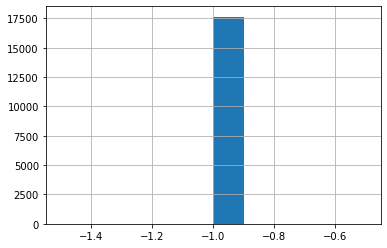

In [169]:
o.updatedAt = pd.to_datetime(o.updatedAt, format='%Y-%m-%d')
o.dist = o.date - o.updatedAt
o.dist.dt.days.hist()
#o = o[o.dist.dt.days<20]

In [170]:
o[(o['strike'] == port.iloc[i]['highStrikeCall'])&(o['expirationDate'] == port.iloc[i]['strike_date'])&(o['type'] == 'CALL')]

,date,ask,bid,change,changePercent,contractName,contractPeriod,contractSize,currency,daysBeforeExpiration,...,openInterest,rho,strike,theoretical,theta,timeValue,type,updatedAt,vega,volume
625,2022-12-25,4.95,4.50,-0.05,-0.0101,ADBE230217C00385000,MONTHLY,REGULAR,USD,53,...,175.0,0.0974,385.0,4.900,-0.1227,0,CALL,2022-12-26,0.3734,9.0
2119,2022-12-26,4.95,4.50,-0.05,-0.0101,ADBE230217C00385000,MONTHLY,REGULAR,USD,52,...,175.0,0.0974,385.0,4.900,-0.1227,0,CALL,2022-12-27,0.3734,9.0
3613,2022-12-27,4.20,3.85,-0.78,-0.1592,ADBE230217C00385000,MONTHLY,REGULAR,USD,51,...,176.0,0.0794,385.0,4.120,-0.1195,0,CALL,2022-12-28,0.3304,42.0
5107,2022-12-28,3.10,2.92,-1.34,-0.3252,ADBE230217C00385000,MONTHLY,REGULAR,USD,50,...,195.0,0.0606,385.0,3.010,-0.1017,0,CALL,2022-12-29,0.2748,44.0
6601,2022-12-29,3.90,3.65,1.17,0.4209,ADBE230217C00385000,MONTHLY,REGULAR,USD,49,...,215.0,0.0755,385.0,3.775,-0.1154,0,CALL,2022-12-30,0.3214,18.0
7991,2022-12-30,3.65,3.45,-0.68,-0.1722,ADBE230217C00385000,MONTHLY,REGULAR,USD,48,...,216.0,0.0707,385.0,3.550,-0.1138,0,CALL,2022-12-31,0.3086,16.0
9381,2022-12-31,3.65,3.45,-0.68,-0.1722,ADBE230217C00385000,MONTHLY,REGULAR,USD,47,...,216.0,0.0707,385.0,3.550,-0.1138,0,CALL,2023-01-01,0.3086,16.0
10848,2023-01-01,3.65,3.45,-0.68,-0.1722,ADBE230217C00385000,MONTHLY,REGULAR,USD,46,...,216.0,0.0707,385.0,3.550,-0.1138,0,CALL,2023-01-02,0.3086,16.0
12328,2023-01-02,3.65,3.45,-0.68,-0.1722,ADBE230217C00385000,MONTHLY,REGULAR,USD,45,...,216.0,0.0707,385.0,3.550,-0.1138,0,CALL,2023-01-03,0.3086,16.0
13808,2023-01-03,3.50,3.30,0.08,0.0245,ADBE230217C00385000,MONTHLY,REGULAR,USD,44,...,221.0,0.0632,385.0,3.350,-0.1184,0,CALL,2023-01-04,0.2904,396.0


In [171]:
#o = o.reset_index()
call1 = o[(o['strike'] == port.iloc[i]['lowStrikeCall'])&(o['expirationDate'] == port.iloc[i]['strike_date'])&(o['type'] == 'CALL')][['date', 'lastPrice', 'expirationDate', 'strike', 'daysBeforeExpiration', 'iv']]
call1.columns = ['date', 'callLow', 'expirationDate', 'strikeCallLow', 'daysBeforeExpiration', 'iv']
call2 = o[(o['strike'] == port.iloc[i]['highStrikeCall'])&(o['expirationDate'] == port.iloc[i]['strike_date'])&(o['type'] == 'CALL')][['date', 'lastPrice', 'strike']]
call2.columns = ['date', 'callHigh', 'strikeCallHigh']
put1 = o[(o['strike'] == port.iloc[i]['lowStrikePut'])&(o['expirationDate'] == port.iloc[i]['strike_date'])&(o['type'] == 'CALL')][['date', 'lastPrice', 'strike']]
put1.columns = ['date', 'putLow', 'strikePutLow']
put2 = o[(o['strike'] == port.iloc[i]['highStrikePut'])&(o['expirationDate'] == port.iloc[i]['strike_date'])&(o['type'] == 'CALL')][['date', 'lastPrice', 'strike']]
put2.columns = ['date', 'putHigh', 'strikePutHigh']

condor = call1.merge(call2, on='date', how='inner')
condor = condor.merge(put1, on='date', how='inner')
condor = condor.merge(put2, on='date', how='inner')

condor['condor'] = condor.callLow-condor.callHigh-condor.putHigh+condor.putLow

In [172]:
condor

,callLow,expirationDate,strikeCallLow,daysBeforeExpiration,iv,callHigh,strikeCallHigh,putLow,strikePutLow,date,putHigh,strikePutHigh,condor


In [5]:
trades = m.stock_data.trade_history.find()

In [6]:
trades = pd.DataFrame.from_records(trades)
trades

,_id,strike_date,rel_risk,high_put_value,low_call_value,high_call_value,low_put_value,highStrikePut,lowStrikeCall,lowStrikePut,highStrikeCall,p,r,ticker,date,value,direction
0,639f90d0271dab5a67b27d79,2023-01-20,0.68200,4.80,11.31,5.80,8.90,87.65,167.7,92.65,172.7,1.088,0.736305,FANG,2022-12-18,10.61,1
1,639f90d0271dab5a67b27d7a,2023-01-20,0.45096,7.20,49.20,21.37,7.00,1600.00,2175.0,1710.00,2300.0,0.408,0.879950,BKNG,2022-12-18,41.80,1
2,639f90d0271dab5a67b27d7b,2023-02-17,0.44000,3.00,4.50,4.30,3.60,105.00,175.0,110.00,180.0,0.408,0.496203,SNOW,2022-12-18,2.10,1
3,639f90d0271dab5a67b27d7c,2023-02-17,0.39200,2.95,3.70,3.95,2.74,155.00,210.0,160.00,215.0,0.408,1.024109,BA,2022-12-18,0.54,1
4,63a2e225fb3bfd92736812de,2023-02-17,0.40000,6.80,8.90,7.85,7.95,230.00,340.0,235.00,345.0,0.408,0.596819,NFLX,2022-12-21,3.25,1
5,63a2e226fb3bfd92736812df,2023-02-17,0.37600,1.32,2.34,1.76,1.84,45.00,75.0,47.50,77.5,0.408,0.364630,SQ,2022-12-21,1.54,1
6,63a2e226fb3bfd92736812e0,2023-02-17,0.36200,3.42,4.22,4.31,3.30,130.00,190.0,135.00,195.0,0.408,0.925014,NVDA,2022-12-21,0.68,1
7,63a2e226fb3bfd92736812e1,2023-02-17,0.35200,0.72,2.03,1.04,1.47,37.50,65.0,40.00,67.5,0.408,0.318059,DOCU,2022-12-21,2.06,1
8,63a2e45e1a9675bf13f1e581,2023-02-17,0.51000,5.15,9.75,7.00,6.50,220.00,380.0,230.00,390.0,0.408,0.773658,ENPH,2022-12-21,5.95,1
9,63a2e45e1a9675bf13f1e582,2023-01-27,0.47200,2.08,4.40,2.08,2.04,160.00,240.0,160.00,245.0,0.408,0.439498,MRNA,2022-12-21,2.28,1


In [6]:
sym = m.get_symbols()

In [7]:
sym.count()

C:\Users\ander\AppData\Local\Temp/ipykernel_35700/3756785629.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  sym.count()


259